In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("solarenergy.csv")
df = df.head(20000)

C:\Users\spase\AppData\Local\Temp\ipykernel_11764\2684062141.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("solarenergy.csv")


In [5]:
df

,Datetime,solar_mw,wind-direction,wind-speed,humidity,average-wind-speed-(period),average-pressure-(period),temperature
0,03/08/2020 0:00,11385,27,7.5,75.0,8.0,29.82,69.0
1,02/08/2020 23:00,12390,27,7.5,77.0,5.0,29.85,69.0
2,02/08/2020 22:00,13312,27,7.5,70.0,0.0,29.89,69.0
3,02/08/2020 21:00,13832,27,7.5,33.0,0.0,29.91,69.0
4,02/08/2020 20:00,14038,27,7.5,21.0,3.0,29.89,69.0
...,...,...,...,...,...,...,...,...
19995,21/04/2018 21:00,10590,NaN,NaN,NaN,NaN,NaN,NaN
19996,21/04/2018 20:00,10263,NaN,NaN,NaN,NaN,NaN,NaN
19997,21/04/2018 19:00,10074,NaN,NaN,NaN,NaN,NaN,NaN
19998,21/04/2018 18:00,10076,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df["Datetime"] = pd.to_datetime(df["Datetime"], format='mixed')
df.set_index(keys=["Datetime"], inplace=True)
df.sort_index(inplace=True)
df

,solar_mw,wind-direction,wind-speed,humidity,average-wind-speed-(period),average-pressure-(period),temperature
Datetime,,,,,,,
2018-01-05 00:00:00,8153,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05 01:00:00,7658,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05 02:00:00,7354,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05 03:00:00,7210,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05 04:00:00,7132,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2020-12-07 19:00:00,15966,32,10.6,90.0,21.0,29.75,58.0
2020-12-07 20:00:00,15285,32,10.6,72.0,20.0,29.86,58.0
2020-12-07 21:00:00,14633,32,10.6,78.0,7.0,29.96,58.0


In [8]:
df.isnull().sum()

solar_mw                           0
wind-direction                 17080
wind-speed                     17080
humidity                       17080
average-wind-speed-(period)    17081
average-pressure-(period)      17080
temperature                    17080
dtype: int64

In [9]:
features = ['wind-direction', 'wind-speed',	'humidity', 'average-wind-speed-(period)', 'average-pressure-(period)',	'temperature']
target = "solar_mw"

In [10]:
for feature in features:
    df[feature] = df[feature].interpolate(method="linear")

C:\Users\spase\AppData\Local\Temp\ipykernel_11764\2750109340.py:2: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df[feature] = df[feature].interpolate(method="linear")


In [11]:
df.isnull().sum()

solar_mw                           0
wind-direction                 17080
wind-speed                     14960
humidity                       14960
average-wind-speed-(period)    14960
average-pressure-(period)      14960
temperature                    14960
dtype: int64

In [12]:
for feature in features:
    df[feature] = df[feature].bfill()

In [13]:
df.isnull().sum()

solar_mw                       0
wind-direction                 0
wind-speed                     0
humidity                       0
average-wind-speed-(period)    0
average-pressure-(period)      0
temperature                    0
dtype: int64

In [16]:
df['wind-direction'].unique()

array(['29', '30', '27', '28', '26', '31', '32', '15', '12', '24', '17',
       '7', '19', '14', '10', '6', '33', '18', '20', 'am', '3', '21',
       '16', '23', '9', '5', '34', '36', '25', '1', '4', '8', '11', '13',
       '2', '22'], dtype=object)

In [17]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['wind-direction'] = encoder.fit_transform(df['wind-direction'])

In [18]:
df = df.groupby(pd.Grouper(freq="3h")).mean()
df

,solar_mw,wind-direction,wind-speed,humidity,average-wind-speed-(period),average-pressure-(period),temperature
Datetime,,,,,,,
2018-01-05 00:00:00,7721.666667,21.0,10.5,81.000000,8.000000,29.940000,62.0
2018-01-05 03:00:00,7162.666667,21.0,10.5,81.000000,8.000000,29.940000,62.0
2018-01-05 06:00:00,7567.000000,21.0,10.5,81.000000,8.000000,29.940000,62.0
2018-01-05 09:00:00,8784.000000,21.0,10.5,81.000000,8.000000,29.940000,62.0
2018-01-05 12:00:00,9046.333333,21.0,10.5,81.000000,8.000000,29.940000,62.0
...,...,...,...,...,...,...,...
2020-12-07 09:00:00,12665.000000,19.0,13.3,70.000000,16.333333,30.163333,55.0
2020-12-07 12:00:00,14748.000000,19.0,13.3,68.000000,14.000000,30.103333,55.0
2020-12-07 15:00:00,15940.333333,23.0,12.4,83.000000,8.333333,29.976667,56.0


In [19]:
import seaborn as sns

<Axes: >

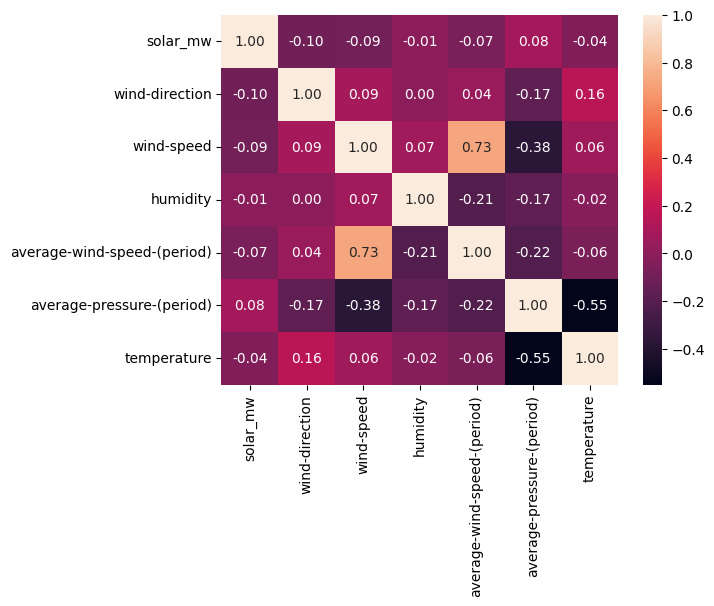

In [20]:
sns.heatmap(df.corr(), annot=True, fmt=".2f")

In [21]:
lags = range(5, 0, -1)
list(lags)

[5, 4, 3, 2, 1]

In [22]:
for lag in lags:
    for column in features + [target]:
        df[f"{column}_{lag}"] = df[column].shift(lag)
df

,solar_mw,wind-direction,wind-speed,humidity,average-wind-speed-(period),average-pressure-(period),temperature,wind-direction_5,wind-speed_5,humidity_5,...,average-pressure-(period)_2,temperature_2,solar_mw_2,wind-direction_1,wind-speed_1,humidity_1,average-wind-speed-(period)_1,average-pressure-(period)_1,temperature_1,solar_mw_1
Datetime,,,,,,,,,,,,,,,,,,,,,
2018-01-05 00:00:00,7721.666667,21.0,10.5,81.000000,8.000000,29.940000,62.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05 03:00:00,7162.666667,21.0,10.5,81.000000,8.000000,29.940000,62.0,NaN,NaN,NaN,...,NaN,NaN,NaN,21.0,10.5,81.0,8.000000,29.940000,62.0,7721.666667
2018-01-05 06:00:00,7567.000000,21.0,10.5,81.000000,8.000000,29.940000,62.0,NaN,NaN,NaN,...,29.940000,62.0,7721.666667,21.0,10.5,81.0,8.000000,29.940000,62.0,7162.666667
2018-01-05 09:00:00,8784.000000,21.0,10.5,81.000000,8.000000,29.940000,62.0,NaN,NaN,NaN,...,29.940000,62.0,7162.666667,21.0,10.5,81.0,8.000000,29.940000,62.0,7567.000000
2018-01-05 12:00:00,9046.333333,21.0,10.5,81.000000,8.000000,29.940000,62.0,NaN,NaN,NaN,...,29.940000,62.0,7567.000000,21.0,10.5,81.0,8.000000,29.940000,62.0,8784.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-07 09:00:00,12665.000000,19.0,13.3,70.000000,16.333333,30.163333,55.0,27.0,1.900000,34.333333,...,30.256667,53.0,9791.666667,19.0,3.8,82.0,3.000000,30.223333,53.0,10584.000000
2020-12-07 12:00:00,14748.000000,19.0,13.3,68.000000,14.000000,30.103333,55.0,27.0,1.900000,70.333333,...,30.223333,53.0,10584.000000,19.0,13.3,70.0,16.333333,30.163333,55.0,12665.000000
2020-12-07 15:00:00,15940.333333,23.0,12.4,83.000000,8.333333,29.976667,56.0,19.0,4.066667,60.666667,...,30.163333,55.0,12665.000000,19.0,13.3,68.0,14.000000,30.103333,55.0,14748.000000


In [23]:
df.drop(columns=features, inplace=True)

In [24]:
df.dropna(axis=0, inplace=True)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X, y = df.drop(columns=[target]), df[target]

In [27]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20, shuffle=False)

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [30]:
scaler = MinMaxScaler()
train_y = scaler.fit_transform(train_y.to_numpy().reshape(-1, 1))

In [31]:
lag = 5
(train_X.shape[0], lag, (train_X.shape[1] // lag))

(5234, 5, 7)

In [32]:
train_X = train_X.reshape((train_X.shape[0], lag, (train_X.shape[1] // lag)))
test_X = test_X.reshape((test_X.shape[0], lag, (test_X.shape[1] // lag)))

In [33]:
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense

In [39]:
model = Sequential([
    Input((train_X.shape[1], train_X.shape[2],)),
    LSTM(64, activation="relu", return_sequences=True),
    LSTM(32, activation="relu", return_sequences=True),
    LSTM(16, activation="relu"),
    Dense(1, activation="linear")
])

In [40]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 5, 64)               │          18,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 5, 32)               │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 16)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,001 (132.82 KB)

 Trainable params: 34,001 (132.82 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(
    loss="mean_squared_error",
    optimizer="adam",
    metrics=["mean_squared_error"],
)

In [42]:
history = model.fit(train_X, train_y, validation_split=0.20, epochs=30, batch_size=64, shuffle=False)

Epoch 1/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0938 - mean_squared_error: 0.0938 - val_loss: 0.0329 - val_mean_squared_error: 0.0329
Epoch 2/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0399 - mean_squared_error: 0.0399 - val_loss: 0.0309 - val_mean_squared_error: 0.0309
Epoch 3/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0386 - mean_squared_error: 0.0386 - val_loss: 0.0296 - val_mean_squared_error: 0.0296
Epoch 4/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0378 - mean_squared_error: 0.0378 - val_loss: 0.0286 - val_mean_squared_error: 0.0286
Epoch 5/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0372 - mean_squared_error: 0.0372 - val_loss: 0.0278 - val_mean_squared_error: 0.0278
Epoch 6/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0367 - mean_squared_error: 0.0367 - val_loss: 0.0270 - val_mean_squared_error: 0.0270
Epoch 7/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0362 - mean_squared_error: 0.0362 - val_loss: 0.0264 - va

<Axes: >

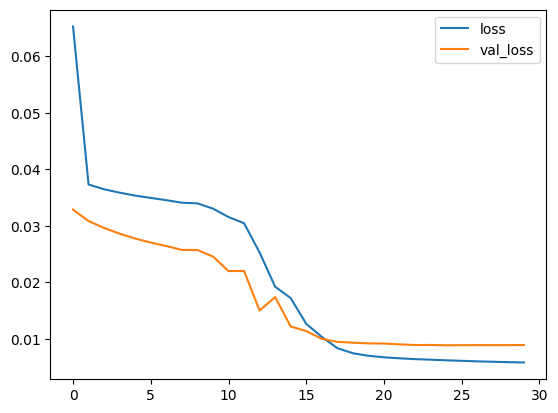

In [43]:
sns.lineplot(history.history["loss"], label="loss")
sns.lineplot(history.history["val_loss"], label="val_loss")

In [44]:
pred_y = model.predict(test_X)

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


In [45]:
pred_y = scaler.inverse_transform(pred_y)

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
(mean_absolute_error(test_y, pred_y), mean_squared_error(test_y, pred_y), r2_score(test_y, pred_y))

(np.float64(941.2008020893018),
 np.float64(1631846.4725050724),
 0.7340426009312087)

<Axes: xlabel='Datetime'>

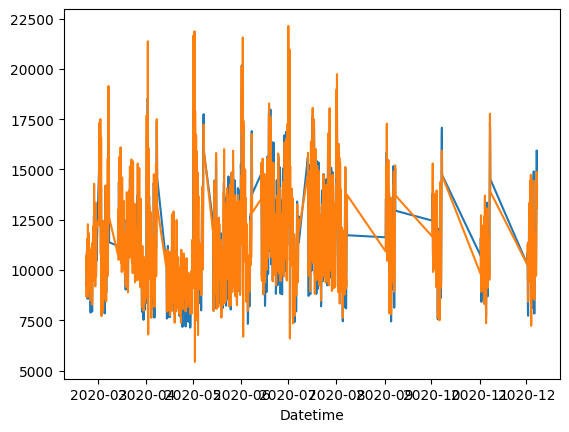

In [47]:
sns.lineplot(x=test_y.index, y=test_y.values)
sns.lineplot(x=test_y.index, y=pred_y.flatten())